#  Working with Activation Functions

In [1]:
from __future__ import print_function
import torch
import numpy as np
import torch.optim
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#torch.nn: - Neural networks can be constructed using the torch.nn package.


In [2]:
x = Variable(torch.randn(100, 10))
y = Variable(torch.randn(100, 30))
linear = nn.Linear(in_features=10, out_features=5, bias=True)
output_linear = linear(x)
print('Output size : ', output_linear.size())
bilinear = nn.Bilinear(in1_features=10, in2_features=30, out_features=5, bias=True)
output_bilinear = bilinear(x, y)
print('Output size : ', output_bilinear.size())

Output size :  torch.Size([100, 5])
Output size :  torch.Size([100, 5])


# Visualizing the Shape of Activation Functions

In [3]:
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.linspace(-10, 10, 1500)
x = Variable(x)
x_1 = x.data.numpy()   # tranforming into numpy
y_relu = F.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

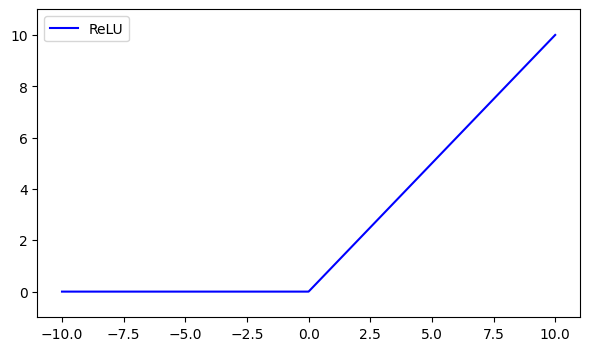

In [5]:
plt.figure(figsize=(7, 4))
plt.plot(x_1, y_relu, c='blue', label='ReLU')
plt.ylim((-1, 11))
plt.legend(loc='best')

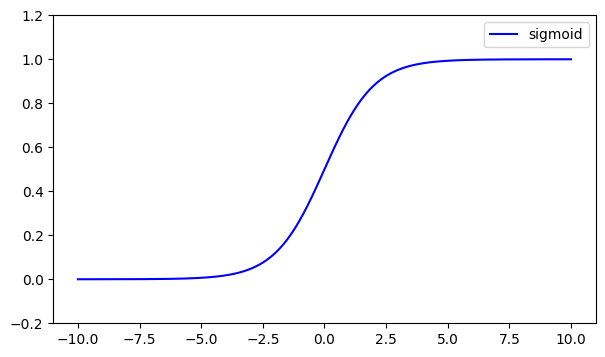

In [6]:
plt.figure(figsize=(7, 4))
plt.plot(x_1, y_sigmoid, c='blue', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

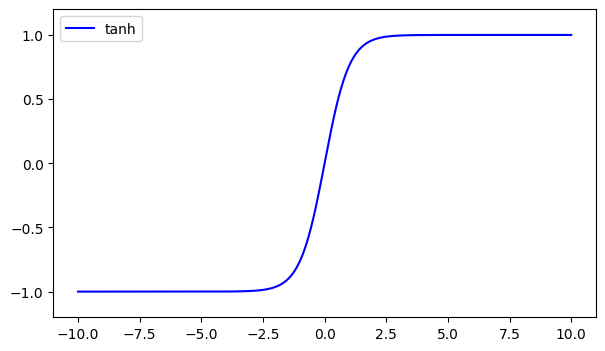

In [7]:
plt.figure(figsize=(7, 4))
plt.plot(x_1, y_tanh, c='blue', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

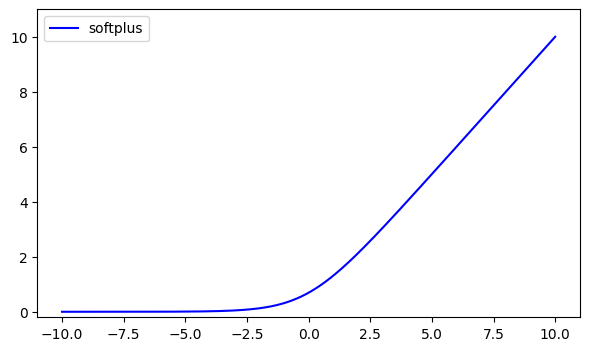

In [8]:
plt.figure(figsize=(7, 4))
plt.plot(x_1, y_softplus, c='blue', label='softplus')
plt.ylim((-0.2, 11))
plt.legend(loc='best')

# Basic Neural Network Model

In [19]:
def prep_data():
    train_X = np.asarray([13.3,14.4,15.5,16.71,16.93,14.168,19.779,16.182,
    17.59,12.167,17.042,10.791,15.313,17.997,15.654,
    19.27,13.1])
    train_Y = np.asarray([11.7,12.76,12.09,13.19,11.694,11.573,13.366, 
    12.596, 12.53,11.221,12.827,13.465,11.65,12.904,12.42,12.94,11.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

In [21]:
# get dynamic parameters
def set_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b
     
#deploy neural network model
def build_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred
#implement in PyTorch
import torch.nn as nn
f = nn.Linear(17,1) # Much simpler.
f

Linear(in_features=17, out_features=1, bias=True)

In [15]:
# calculate the loss function
def loss_calc(y, y_pred):
    loss = (y_pred - y).pow(2).sum()
    for param in [w, b]:
        if not param.grad is None:
            param.grad.data.zero_()
    loss.backward()
    return loss.data

# optimizing results
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data


In [26]:

learning_rate = 1e-4
x, y = prep_data()  # x - training data, y - target variables
w, b = set_weights()  # w, b - parameters

for i in range(10000):
    y_pred = build_network(x)  # function which computes wx + b
    loss = loss_calc(y, y_pred)  # error calculation
    if i % 1000 == 0:
        print(loss)
        print(w)
    optimize(learning_rate)

tensor(7122.0781)
tensor([-0.4212], requires_grad=True)
tensor(52.1336)
tensor([0.8082], requires_grad=True)
tensor(45.7185)
tensor([0.7582], requires_grad=True)
tensor(40.2132)
tensor([0.7120], requires_grad=True)
tensor(35.4887)
tensor([0.6691], requires_grad=True)
tensor(31.4342)
tensor([0.6294], requires_grad=True)
tensor(27.9547)
tensor([0.5926], requires_grad=True)
tensor(24.9687)
tensor([0.5585], requires_grad=True)
tensor(22.4062)
tensor([0.5270], requires_grad=True)
tensor(20.2070)
tensor([0.4977], requires_grad=True)


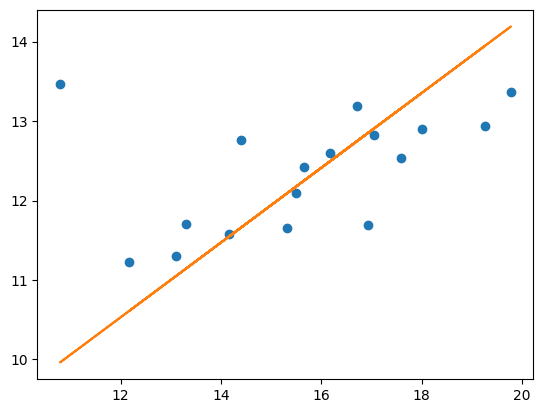

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
x_numpy = x.data.numpy()
y_numpy = y.data.numpy()
y_pred = y_pred.data.numpy()
plt.plot(x_numpy,y_numpy,'o')
plt.plot(x_numpy,y_pred,'-')

# Tensor Differentiation

In [28]:
x = Variable(torch.ones(4, 4) * 12.5, requires_grad=True)
fn = 2 * (x * x) + 5 * x + 6
# 2x^2 + 5x + 6
fn.backward(torch.ones(4,4))
print(x.grad)

tensor([[55., 55., 55., 55.],
        [55., 55., 55., 55.],
        [55., 55., 55., 55.],
        [55., 55., 55., 55.]])
